# 1. 免学部分
* 这一章只有14面内容，所以暂不设免学部分

# 2. 前言

* 大家在做题目前一定要先把第5章的书大概的读一下
* 写本作业，请使用 Anaconda 里的 Notebook
* 我做了一个[打包下载 Link](https://downgit.github.io/#/home?url=https://github.com/liuhui998/pe2/tree/master/05-missing), 大家下载下来解压后，使用 Notebook 打开

# 3. 学习概要
* 我会在每道题有前标明对的书页码
* 如果超纲我会提前提示，并加上资料 Link
---

知识点整理

* 缺失值也叫空值，这是我们每天会碰到的情况，比如系统坏了，有些天的数据丢了；客户调查时，有些人信息没填全

* pd.isnull(各种数据) 检查参数是否为空(NaN/null)
* df.isnull() 检查 DataFrame 里有哪些值为空(NaN/null)
* df['colname'].isnull() 检查 DataFrame 这一列里里有哪些值为空(NaN/null)
* df.fillna() 填充缺失值
* df.interploate() 插值补充缺失值（如果要按数据梯度补数据非常有用）

---
我在 [时间序列小书](https://github.com/liuhui998/time-series-little-book/) 中也写了两篇文章专门说怎么补充缺失值：

* [如何补充缺失值1/Peter](https://github.com/liuhui998/time-series-little-book/blob/master/05-missing-values-1/missing-values.ipynb)
* [如何补充缺失值2/Peter](https://github.com/liuhui998/time-series-little-book/blob/master/05-missing-values-2/missing-values.ipynb)

In [35]:
# 先导入 pandas 包
import pandas as pd
pd.options.plotting.backend = "plotly"

# 4. 找出订单表中没有物流号的订单
--- 
备注：这里综合了 p107的内容

大家记住 fillna 不会改变数据本身的内容，它只会返回一个新数据，如果要改变数据本身，请加上 inplace=True

这个规律不但对 fillna 适用，对于后面其它很多函数也适用

* 读取本地目录下的 trackings_all.xlsx 到  trackings_all
* 将tracking_no 为空的数据的 tracking_no 改为 "missing", is_delivered 为 0


In [36]:
#读取本地目录下的 trackings_all.xlsx 到 trackings_all
trackings_all = pd.read_excel("trackings_all.xlsx")
trackings_all

,order_no,sku,quantity,tracking_no,is_delivered
0,O_2020_01,A1234,2,T_2020_1,1.0
1,O_2020_02,A1234,2,T_2020_2,0.0
2,O_2020_03,A1235,1,T_2020_3,1.0
3,O_2020_04,A1235,1,NaN,NaN


In [37]:
# 这样改不会改掉 trackings_all 里的内容（非题目）
trackings_all['tracking_no'].fillna("missing")

0    T_2020_1
1    T_2020_2
2    T_2020_3
3     missing
Name: tracking_no, dtype: object

In [38]:
# 现在 tracking_no 还是为空（非题目）
trackings_all

,order_no,sku,quantity,tracking_no,is_delivered
0,O_2020_01,A1234,2,T_2020_1,1.0
1,O_2020_02,A1234,2,T_2020_2,0.0
2,O_2020_03,A1235,1,T_2020_3,1.0
3,O_2020_04,A1235,1,NaN,NaN


In [39]:
# 将tracking_no 为空的数据的 tracking_no 改为 "missing"
# 加入了 inplace = True, 就会直接改原始值，而不只是返回一个新的数值
# inplace = True 在后面很多函数都可以用到，大家一定记住
trackings_all['tracking_no'].fillna('missing',inplace = True)
trackings_all

,order_no,sku,quantity,tracking_no,is_delivered
0,O_2020_01,A1234,2,T_2020_1,1.0
1,O_2020_02,A1234,2,T_2020_2,0.0
2,O_2020_03,A1235,1,T_2020_3,1.0
3,O_2020_04,A1235,1,missing,NaN


In [40]:
# 将is_delivered 为空的数据的  is_delivered 为 0
trackings_all.is_delivered.fillna(0,inplace = True)
trackings_all

,order_no,sku,quantity,tracking_no,is_delivered
0,O_2020_01,A1234,2,T_2020_1,1.0
1,O_2020_02,A1234,2,T_2020_2,0.0
2,O_2020_03,A1235,1,T_2020_3,1.0
3,O_2020_04,A1235,1,missing,0.0


# 5. 处理 Amazon review 数据缺失的情况
--- 
备注：这里综合了 p94, p108的内容

* 这里使用了 pd.date_range 生成了一段连续的日期信息  [pandas中时间序列——date_range函数](https://blog.csdn.net/kancy110/article/details/77131539)
  
* 使用了 merge left 来拼接数据 [Pandas Merge 详解](https://blog.csdn.net/stevenkwong/article/details/52540605)

* 也使用了 df.interploate 来生成插值 ，补数据 [interpolate函数方法的使用](https://www.cjavapy.com/article/541/)

---
你现在是产品经理，你现在要进行星级趋势分析，你现在找缺失的数据合理的补回来：

* 现在有一张 SKU A1234 的 Amazon Review 表
* 字段有两列:  day（日期）, star（星级）
* 现在有一些的数据(6月25号到7月18号)是缺失的，我们想把它补上
* 补上数据一是补上天数，同时要把缺失的星级按合理的方式补上来，因为这一个月里他从5星掉到4.8星


---

* 读取 asin_star.xlsx 到 asin_star_df

* 将 asin_star_df 的 day 列转成日期类型， 并将 day 设为索引

* 生一个时间列表 time_index，从 2019-04-27' 到 '2019-11-12' (用pd.date_range)

* 用 time_index 为索引，生成一个 full_time_df

* 用 full_time_df left联接 asin_star_df （使用 merge 函数, how="left")
  把数据放到 new_df 上

  到这一步，把缺失的天数给补全了
  
* 再使用插值的方式，将数据补充全完  

* 备注，我们每一步都画图查看，配合检查数据问题
--- 
缺失数据处理是业务数据处理上非常重要的一环，大家可再读一下我写的两篇文章:

* [如何补充缺失值1/Peter](https://github.com/liuhui998/time-series-little-book/blob/master/05-missing-values-1/missing-values.ipynb)
* [如何补充缺失值2/Peter](https://github.com/liuhui998/time-series-little-book/blob/master/05-missing-values-2/missing-values.ipynb)

In [41]:
#读取 asin_star.xlsx 到 asin_star_df
asin_star_df = pd.read_excel("asin_star.xlsx")
asin_star_df.head()

,day,star
0,2019-04-27,5.0
1,2019-04-28,5.0
2,2019-04-29,5.0
3,2019-04-30,5.0
4,2019-05-01,5.0


In [42]:
#将 asin_star_df 的 day 列转成日期类型
asin_star_df['day'] = pd.to_datetime(asin_star_df['day'])
asin_star_df.dtypes

day     datetime64[ns]
star           float64
dtype: object

In [43]:
# 将 day 设为索引
asin_star_df = asin_star_df.set_index("day")
asin_star_df

,star
day,
2019-04-27,5.0
2019-04-28,5.0
2019-04-29,5.0
2019-04-30,5.0
2019-05-01,5.0
...,...
2019-11-08,4.8
2019-11-09,4.8
2019-11-10,4.8


In [44]:
# 查看数据行数（非题目）
asin_star_df.shape

(176, 1)

In [45]:
# 看一下最后一行是哪一天（非题目）
asin_star_df.tail(1)

,star
day,
2019-11-12,4.8


In [46]:
# 大家把鼠标移到图上看看，哪几天的数据没了（非题目）
star_fig1 = asin_star_df.plot()
star_fig1.show()

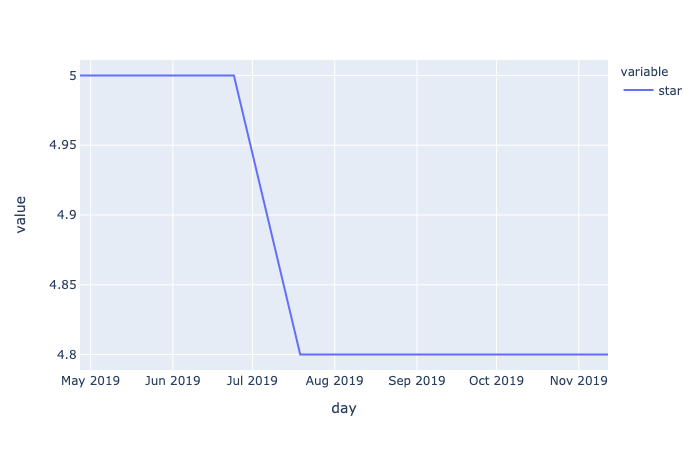

In [47]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
star_fig1.show('png')

In [48]:
#生一个时间列表 time_index，从 2019-04-27' 到 '2019-11-12' (用pd.date_range)
time_index = pd.date_range(start='2019-04-27',end='2019-11-12')
time_index

DatetimeIndex(['2019-04-27', '2019-04-28', '2019-04-29', '2019-04-30',
               '2019-05-01', '2019-05-02', '2019-05-03', '2019-05-04',
               '2019-05-05', '2019-05-06',
               ...
               '2019-11-03', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-09', '2019-11-10',
               '2019-11-11', '2019-11-12'],
              dtype='datetime64[ns]', length=200, freq='D')

In [49]:
# 用 time_index 为索引，生成一个 full_time_df
full_time_df = pd.DataFrame(index=time_index)
full_time_df

""
2019-04-27
2019-04-28
2019-04-29
2019-04-30
2019-05-01
...
2019-11-08
2019-11-09
2019-11-10
2019-11-11


In [50]:
# 看一下两个 DataFrame 的索引，看看它们的数量差别（非题目）
print(asin_star_df.index)
print(full_time_df.index)

DatetimeIndex(['2019-04-27', '2019-04-28', '2019-04-29', '2019-04-30',
               '2019-05-01', '2019-05-02', '2019-05-03', '2019-05-04',
               '2019-05-05', '2019-05-06',
               ...
               '2019-11-03', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-09', '2019-11-10',
               '2019-11-11', '2019-11-12'],
              dtype='datetime64[ns]', name='day', length=176, freq=None)
DatetimeIndex(['2019-04-27', '2019-04-28', '2019-04-29', '2019-04-30',
               '2019-05-01', '2019-05-02', '2019-05-03', '2019-05-04',
               '2019-05-05', '2019-05-06',
               ...
               '2019-11-03', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-09', '2019-11-10',
               '2019-11-11', '2019-11-12'],
              dtype='datetime64[ns]', length=200, freq='D')


In [51]:
#用 full_time_df left联接 asin_star_df （使用 merge 函数, how="left")
#  把数据放到 new_df 上
new_df = full_time_df.merge(asin_star_df,left_index=True,right_index=True,how="left")
new_df.head(70).tail(20)

,star
2019-06-16,5.0
2019-06-17,5.0
2019-06-18,5.0
2019-06-19,5.0
2019-06-20,5.0
2019-06-21,5.0
2019-06-22,5.0
2019-06-23,5.0
2019-06-24,5.0
2019-06-25,NaN


In [52]:
# 现在画图查看一下，很明显的看出哪几天数据缺失了（非题目）
star_fig2 = new_df.plot()
star_fig2.show()

In [55]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
star_fig2.show()

In [53]:
# 再使用插值的方式，将数据补充全完, 使用 interpolate 函数时，可以增加 inplace=True 的参数
# 大家看看数据是一个怎么样的梯度
new_df.interpolate(inplace=True)
new_df.head(70).tail(20)

,star
2019-06-16,5.000
2019-06-17,5.000
2019-06-18,5.000
2019-06-19,5.000
2019-06-20,5.000
2019-06-21,5.000
2019-06-22,5.000
2019-06-23,5.000
2019-06-24,5.000
2019-06-25,4.992


In [56]:
# 画图查看数据（非题目），把鼠标放到梯度斜线上看看数据
star_fig3 = new_df.plot()
star_fig3.show()

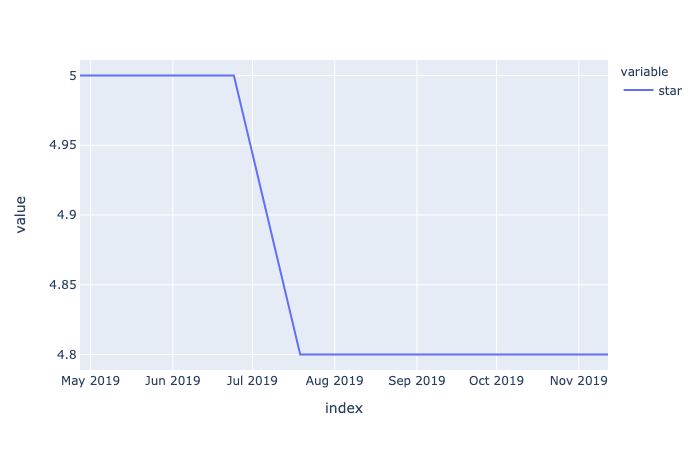

In [57]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
star_fig3.show('png')

In [20]:
# 也可以使用 value_counts() 查看某一列的数据分布 情况，（非题目）
new_df['star'].value_counts()

4.800    117
5.000     59
4.936      1
4.880      1
4.816      1
4.848      1
4.912      1
4.968      1
4.976      1
4.856      1
4.840      1
4.824      1
4.960      1
4.888      1
4.896      1
4.832      1
4.944      1
4.864      1
4.984      1
4.928      1
4.920      1
4.808      1
4.872      1
4.992      1
4.904      1
4.952      1
Name: star, dtype: int64

In [21]:
# 对 star 进行取整到小数点后一位: (非题目)
new_df['star'] = new_df['star'].round(1)
new_df['star'].value_counts()

4.8    123
5.0     65
4.9     12
Name: star, dtype: int64

In [58]:
# 看看新的数据图，是不是星级下降的更合理了: (非题目)
star_fig4 = new_df.plot()
star_fig4.show()

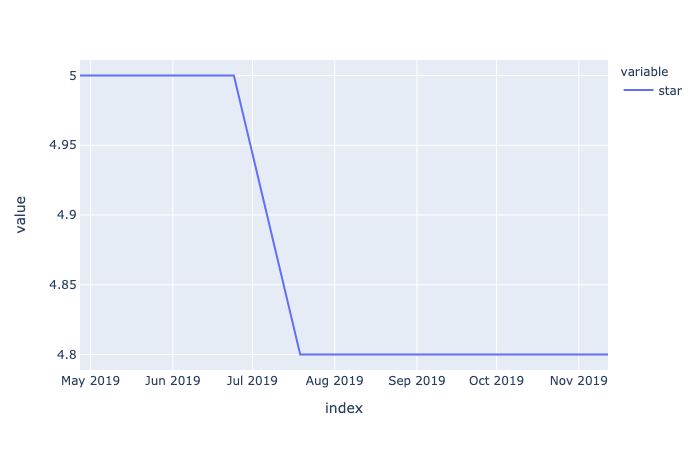

In [59]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
star_fig4.show('png')

# 6. 处理缺失的客户调查数据
---
备注：参考了 p99,p110

这个题目有点跳跃，有前面章节的数据过滤的内容，也有跳过空值求平均的内容

* [Pandas DataFrame 数据选取和过滤](https://yangjin795.github.io/pandas_df_selection.html)

* [Pandas DataFrame 多条件筛选](https://cloud.tencent.com/developer/article/1598307)
--- 
你现在是公司的品牌经理，公司给了一堆客户调查问卷进行分析

里面有很多缺失数据，我们要进行数据清洗与处理:

* 现在有一张客户调查表 survey.xlsx, 把它读取 survey

  字段有 name(姓名),gender(性别),income(收入）

* 删掉所有 gender(性别） 为空的调查数据,  把新的数据放到 new_survey
   
   
* 计算男性 (gender=='Male') 的平均收入 : male_avg

  (先对 gender 过滤, 再对 income 用 mean 求平均，记得使用 skipna 参数）
  
* 计算女性 (gender=='Female') 的平均收入 : female_avg

  (先对 gender 过滤, 再对 income 用 mean 求平均，记得使用 skipna 参数）

* 使用男性平均收入，填充男性客户收入值缺失的数据 (income.isnull())

* 使用女性平均收入，填充女性客户收入值缺失的数据 (income.isnull())

In [23]:
#现在有一张客户调查表 survey.xlsx, 把它读取 survey
survey = pd.read_excel("survey.xlsx")
survey

,name,gender,income
0,Trump,Male,10000.0
1,Bob,Male,20000.0
2,Bush,Male,24000.0
3,Alex,Male,NaN
4,Alice,Female,20000.0
5,Linda,Female,18000.0
6,Cora,Female,14000.0
7,Chloe,Female,NaN
8,XYZ,NaN,NaN


In [24]:
# 删掉所有 gender(性别） 为空的调查数据
# 使用过滤，取所有 gender 不为空的行，并且copy() 到 new_survey
#  有个细节点，过滤生成 DataFrame对象，修改时可能会报警(Warning), 
#  可以在生成时加上 copy()， 这样就不会报警(Warning)
new_survey = survey[survey['gender'].notnull()].copy()
new_survey

,name,gender,income
0,Trump,Male,10000.0
1,Bob,Male,20000.0
2,Bush,Male,24000.0
3,Alex,Male,NaN
4,Alice,Female,20000.0
5,Linda,Female,18000.0
6,Cora,Female,14000.0
7,Chloe,Female,NaN


In [25]:
#计算男性 (gender=='Male') 的平均收入
#(先对 gender 过滤, 再对 income 用 mean 求平均，记得使用 skipna 参数）
male_avg = new_survey[new_survey['gender'] == 'Male']['income'].mean(skipna = True)
male_avg

18000.0

In [26]:
#计算女性 (gender=='Female') 的平均收入 : female_avg
#  (先对 gender 过滤, 再对 income 用 mean 求平均，记得使用 skipna 参数）
female_avg = new_survey[new_survey['gender'] == 'Female']['income'].mean(skipna = True)
female_avg

17333.333333333332

In [27]:
# 非题目
new_survey['gender'] == 'Male'

0     True
1     True
2     True
3     True
4    False
5    False
6    False
7    False
Name: gender, dtype: bool

In [28]:
# 查看哪些行的 income 为空， （非题目）
new_survey['income'].isnull()

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7     True
Name: income, dtype: bool

In [29]:
# 使用男性平均收入，填充男性客户收入值缺失的数据 (income.isnull())
# is_male 是找到所有为 gender为 Male 的行
# is_income_null 找到所有为 income 为空的行
# is_male & is_income_null 表示所有: gender为 Male 且 income 为空的行
# loc 的第一个参是按行取，第二个参数是按列取

is_male = (new_survey['gender'] == 'Male')
is_income_null =  new_survey['income'].isnull()
new_survey.loc[is_male & is_income_null,'income'] = male_avg
new_survey

,name,gender,income
0,Trump,Male,10000.0
1,Bob,Male,20000.0
2,Bush,Male,24000.0
3,Alex,Male,18000.0
4,Alice,Female,20000.0
5,Linda,Female,18000.0
6,Cora,Female,14000.0
7,Chloe,Female,NaN


In [30]:
# 示例如何取整，非题目
round(female_avg)

17333

In [31]:
#使用女性平均收入，填充女性客户收入值缺失的数据 (income.isnull())
is_female = new_survey['gender'] == 'Female'
new_survey.loc[is_female & is_income_null,'income'] = round(female_avg)
new_survey

,name,gender,income
0,Trump,Male,10000.0
1,Bob,Male,20000.0
2,Bush,Male,24000.0
3,Alex,Male,18000.0
4,Alice,Female,20000.0
5,Linda,Female,18000.0
6,Cora,Female,14000.0
7,Chloe,Female,17333.0


# 参考资料
* [如何补充缺失值1/Peter](https://github.com/liuhui998/time-series-little-book/blob/master/05-missing-values-1/missing-values.ipynb)
* [如何补充缺失值2/Peter](https://github.com/liuhui998/time-series-little-book/blob/master/05-missing-values-2/missing-values.ipynb)
* [pandas中时间序列——date_range函数](https://blog.csdn.net/kancy110/article/details/77131539)
* [Pandas Merge 详解](https://blog.csdn.net/stevenkwong/article/details/52540605)
* [interpolate函数方法的使用](https://www.cjavapy.com/article/541/)
* [Pandas DataFrame 数据选取和过滤](https://yangjin795.github.io/pandas_df_selection.html)
* [Pandas DataFrame 多条件筛选](https://cloud.tencent.com/developer/article/1598307)